In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Cargar los datos**

In [ ]:
import pandas as pd

# Cargar los datos desde Google Drive
file_path = "/content/drive/My Drive/IA/Rest-Mex_2025_train.csv"
df = pd.read_csv(file_path)

# Contar instancias antes del preprocesamiento
print("Instancias antes del preprocesamiento:", len(df))

# Verificar las primeras filas
print(df.head())


Instancias antes del preprocesamiento: 208051
                               Title  \
0              Mi Lugar Favorito!!!!   
1  lugares interesantes para visitar   
2             No es el mismo Dreams    
3  un buen panorama cerca de CancÃºn   
4                           El mejor   

                                              Review  Polarity          Town  \
0  Excelente lugar para comer y pasar una buena n...       5.0      Sayulita   
1  andar mucho, así que un poco difícil para pers...       4.0         Tulum   
2  Es nuestra cuarta visita a Dreams Tulum, elegi...       3.0         Tulum   
3  Estando en CancÃºn, fuimos al puerto y tomamos...       4.0  Isla_Mujeres   
4  Es un lugar antiguo y por eso me encanto tiene...       5.0     Patzcuaro   

        Region        Type  
0      Nayarit  Restaurant  
1  QuintanaRoo  Attractive  
2  QuintanaRoo       Hotel  
3  QuintanaRoo  Attractive  
4    Michoacan       Hotel  


# **Preprocesamiento: Limpiar texto**

## **PASO 1: Vamos a identificar que tipo de codificacion está usando**
usaremos el **file_path**

In [ ]:
# Opción 1: utf-8
try:
    df = pd.read_csv(file_path, encoding='utf-8')
    print("Codificación utf-8 cargada con éxito")
    print(df.head())
except Exception as e:
    print("Error con utf-8:", e)

# Opción 2: latin1
try:
    df = pd.read_csv(file_path, encoding='latin1')
    print("Codificación latin1 cargada con éxito")
    print(df.head())
except Exception as e:
    print("Error con latin1:", e)

# Opción 3: cp1252 (Windows)
try:
    df = pd.read_csv(file_path, encoding='cp1252')
    print("Codificación cp1252 cargada con éxito")
    print(df.head())
except Exception as e:
    print("Error con cp1252:", e)


Codificación utf-8 cargada con éxito
                               Title  \
0              Mi Lugar Favorito!!!!   
1  lugares interesantes para visitar   
2             No es el mismo Dreams    
3  un buen panorama cerca de CancÃºn   
4                           El mejor   

                                              Review  Polarity          Town  \
0  Excelente lugar para comer y pasar una buena n...       5.0      Sayulita   
1  andar mucho, así que un poco difícil para pers...       4.0         Tulum   
2  Es nuestra cuarta visita a Dreams Tulum, elegi...       3.0         Tulum   
3  Estando en CancÃºn, fuimos al puerto y tomamos...       4.0  Isla_Mujeres   
4  Es un lugar antiguo y por eso me encanto tiene...       5.0     Patzcuaro   

        Region        Type  
0      Nayarit  Restaurant  
1  QuintanaRoo  Attractive  
2  QuintanaRoo       Hotel  
3  QuintanaRoo  Attractive  
4    Michoacan       Hotel  
Codificación latin1 cargada con éxito
                             

**Opcion B:**
Usamos Chardet y nos indicará que codificación se está usando , claro que debemos tener en cuenta que va a demorar porque analiza todas las instancias , una alternativa seria usar una muestra de por ejem: 10Kbytes

In [ ]:
import chardet

          # Leer los primeros bytes del archivo
          #with open(file_path, 'rb') as f:
          #   result = chardet.detect(f.read(10000))  # Detecta usando los primeros 10k bytes


# Leer todo el contenido del archivo
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())  # Detecta usando todo el archivo

print("Codificación detectada:", result['encoding'])



Codificación detectada: utf-8


### **PASO 2: Vamos a revisar que caracteres extraños hay en cada instancia**
Aqui ya conociendo que la codificacion usada es utf-8

In [ ]:
import re
import pandas as pd

# Función que evalúa la rareza del texto (porcentaje de caracteres "extraños")
def porcentaje_caracteres_no_comunes(texto):
    # Lista de caracteres válidos (puedes ajustarlo si es necesario)
    caracteres_comunes = re.findall(r"[a-zA-ZáéíóúÁÉÍÓÚñÑüÜ .,;:¡!¿?0-9]", texto)

    # Calculamos la "rareza" como la proporción de caracteres no comunes
    return 1 - len(caracteres_comunes) / max(1, len(texto))

# Función para identificar si un texto contiene caracteres sospechosos
def contiene_caracteres_sospechosos(texto):
    return bool(re.search(r'[ÃÂ¢â€œâ€]', texto))  # Puedes agregar más patrones aquí si necesitas

# Leer el dataset
df = pd.read_csv("/content/drive/My Drive/IA/Rest-Mex_2025_train.csv", encoding="utf-8")

# Evaluamos el porcentaje de caracteres raros para cada instancia (fila)
df['error_ratio'] = df['Review'].apply(porcentaje_caracteres_no_comunes)

# Identificamos filas con más del 20% de caracteres raros
filas_con_errores = df[df['error_ratio'] > 0.15]

# Mostrar las filas problemáticas
print("Número de filas con posibles problemas de codificación:", filas_con_errores.shape[0])
print(filas_con_errores[['Title', 'Review', 'error_ratio']])


Número de filas con posibles problemas de codificación: 6
                                      Title  \
41921   Es un restaurant fuera de lo común.   
94937                       variedad-comida   
121944                          Las Tinajas   
127316                            Increíble   
153199                            BUENISIMO   
170002               vista-panorámica-Taxco   

                                                   Review  error_ratio  
41921   Precios muy accesibles. excelente servicio. To...     0.246154  
94937   -recomiendo-bufet-buen-precio&variedad-comida(...     0.160221  
121944  Gran mole___________________________________ d...     0.660377  
127316  En resúmen:\n\nambiente increíble comida\nincr...     0.324786  
153199  Estuve por negocio 10 días y la pasé super bie...     0.167305  
170002  -excelente-vista\n-opciones-menú:\nplato-entra...     0.162963  


In [ ]:
# Eliminar las filas con más del 20% de caracteres raros
df_limpio = df[df['error_ratio'] <= 0.15]

# Verificar el número de filas después de la eliminación
print("Número de filas después de eliminar las filas problemáticas:", df_limpio.shape[0])

# Mostrar las primeras filas del DataFrame limpio
print(df_limpio.head())


Número de filas después de eliminar las filas problemáticas: 208045
                               Title  \
0              Mi Lugar Favorito!!!!   
1  lugares interesantes para visitar   
2             No es el mismo Dreams    
3  un buen panorama cerca de CancÃºn   
4                           El mejor   

                                              Review  Polarity          Town  \
0  Excelente lugar para comer y pasar una buena n...       5.0      Sayulita   
1  andar mucho, así que un poco difícil para pers...       4.0         Tulum   
2  Es nuestra cuarta visita a Dreams Tulum, elegi...       3.0         Tulum   
3  Estando en CancÃºn, fuimos al puerto y tomamos...       4.0  Isla_Mujeres   
4  Es un lugar antiguo y por eso me encanto tiene...       5.0     Patzcuaro   

        Region        Type  error_ratio  
0      Nayarit  Restaurant     0.009615  
1  QuintanaRoo  Attractive     0.000000  
2  QuintanaRoo       Hotel     0.003797  
3  QuintanaRoo  Attractive     0.026549  


In [ ]:
import re

# Función de limpieza mejorada
def clean_text(text):
    text = text.strip()  # Eliminar espacios extra
    # Solo eliminar caracteres no alfabéticos, pero mantener los acentos y la puntuación
    text = re.sub(r"[^a-zA-ZáéíóúüñÁÉÍÓÚÜÑ0-9,.!? ]", "", text)
    return text


# Aplicar la limpieza a las reseñas
df_limpio["Review"] = df_limpio["Review"].apply(clean_text)

# Verificar el número de filas después de la eliminación
print("Número de filas:", df_limpio.shape[0])

# Mostrar las primeras filas del DataFrame limpio
print(df_limpio.head())



Número de filas: 208045
                               Title  \
0              Mi Lugar Favorito!!!!   
1  lugares interesantes para visitar   
2             No es el mismo Dreams    
3  un buen panorama cerca de CancÃºn   
4                           El mejor   

                                              Review  Polarity          Town  \
0  Excelente lugar para comer y pasar una buena n...       5.0      Sayulita   
1  andar mucho, así que un poco difícil para pers...       4.0         Tulum   
2  Es nuestra cuarta visita a Dreams Tulum, elegi...       3.0         Tulum   
3  Estando en Cancn, fuimos al puerto y tomamos u...       4.0  Isla_Mujeres   
4  Es un lugar antiguo y por eso me encanto tiene...       5.0     Patzcuaro   

        Region        Type  error_ratio  
0      Nayarit  Restaurant     0.009615  
1  QuintanaRoo  Attractive     0.000000  
2  QuintanaRoo       Hotel     0.003797  
3  QuintanaRoo  Attractive     0.026549  
4    Michoacan       Hotel     0.000000  


<ipython-input-16-6edf93186282>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio["Review"] = df_limpio["Review"].apply(clean_text)


In [ ]:
# Eliminar filas con valores faltantes en cualquier columna
df_limpio = df_limpio.dropna()

# Asegurarse de que la columna 'Polarity' sea numérica
df_limpio['Polarity'] = pd.to_numeric(df_limpio['Polarity'], errors='coerce')

# Eliminar filas donde 'Polarity' es NaN (después de la conversión) y filtrar valores válidos entre 1.0 y 5.0
df_limpio = df_limpio[(df_limpio['Polarity'] >= 1.0) & (df_limpio['Polarity'] <= 5.0)]

# Reiniciar el índice después de eliminar filas
df_limpio = df_limpio.reset_index(drop=True)

# Contar instancias después del preprocesamiento
print("Instancias después del preprocesamiento:", len(df_limpio))

# Mostrar una muestra del DataFrame limpio
print(df_limpio.head(10))



Instancias después del preprocesamiento: 208043
                                               Title  \
0                              Mi Lugar Favorito!!!!   
1                  lugares interesantes para visitar   
2                             No es el mismo Dreams    
3                  un buen panorama cerca de CancÃºn   
4                                           El mejor   
5                                           Preciosa   
6                                 Maravillosa Playa.   
7  Un muy buen lugar para quedarse y comer en Pal...   
8                                  Tiempo para mi...   
9                           Buena Ubicación y limpio   

                                              Review  Polarity  \
0  Excelente lugar para comer y pasar una buena n...       5.0   
1  andar mucho, así que un poco difícil para pers...       4.0   
2  Es nuestra cuarta visita a Dreams Tulum, elegi...       3.0   
3  Estando en Cancn, fuimos al puerto y tomamos u...       4.0   
4  Es

<ipython-input-17-0968a9e0d10f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['Polarity'] = pd.to_numeric(df_limpio['Polarity'], errors='coerce')


### **Distribución (frecuencia) de longitud de palabras**

Primero revisaremos la longitud y frecuencia de estos textos para, segun lo obtenido ver si truncamos o realizamos otra tarea previa


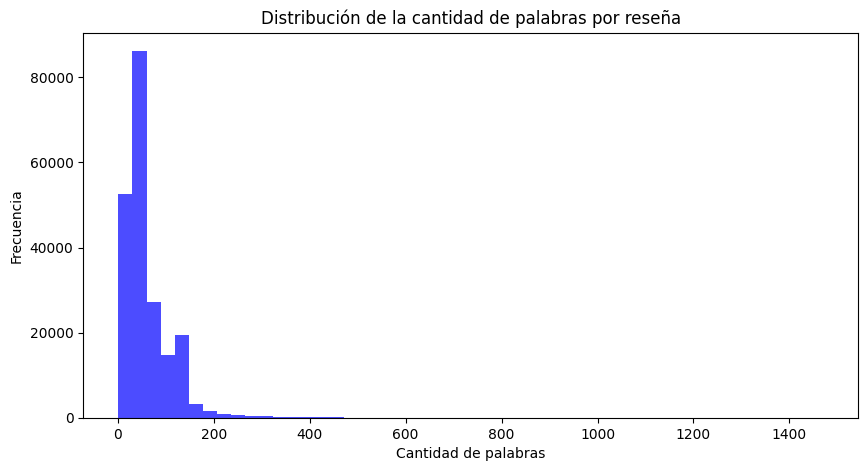

In [ ]:
import matplotlib.pyplot as plt

# Contar palabras por texto en el DataFrame limpio
df_limpio["word_count"] = df_limpio["Review"].apply(lambda x: len(x.split()))

# Graficar distribución de cantidad de palabras
plt.figure(figsize=(10,5))
plt.hist(df_limpio["word_count"], bins=50, color="blue", alpha=0.7)
plt.xlabel("Cantidad de palabras")
plt.ylabel("Frecuencia")
plt.title("Distribución de la cantidad de palabras por reseña")
plt.show()




Analizando el balanceo de las instancias segun polarity

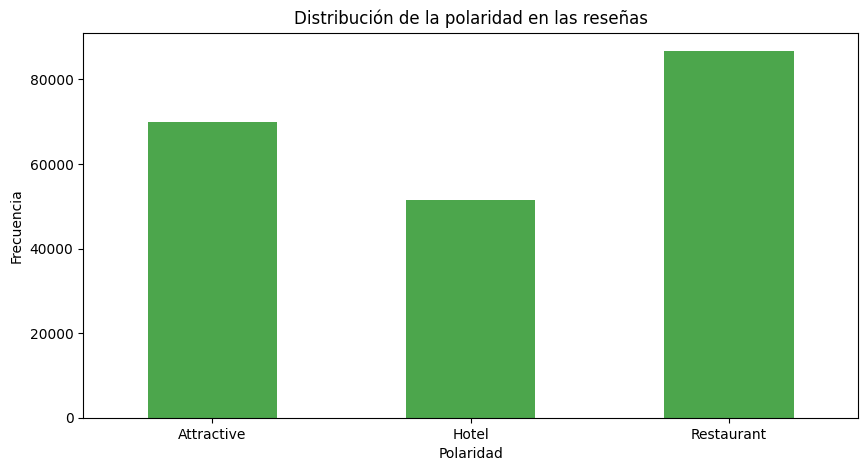

Conteo de instancias por polaridad:
Type
Attractive    69920
Hotel         51409
Restaurant    86714
Name: count, dtype: int64

Porcentaje de instancias por polaridad:
Type
Attractive    33.608437
Hotel         24.710757
Restaurant    41.680806
Name: count, dtype: float64


In [ ]:
import matplotlib.pyplot as plt

# Contar la cantidad de instancias por cada clase de polaridad
polaridad_counts = df_limpio['Type'].value_counts().sort_index()

# Visualizar la distribución de la polaridad
plt.figure(figsize=(10,5))
polaridad_counts.plot(kind='bar', color='green', alpha=0.7)
plt.xlabel("Polaridad")
plt.ylabel("Frecuencia")
plt.title("Distribución de la polaridad en las reseñas")
plt.xticks(rotation=0)
plt.show()

# Mostrar el conteo de instancias por clase de polaridad
print("Conteo de instancias por polaridad:")
print(polaridad_counts)

# Calcular el porcentaje de cada clase de polaridad
polaridad_percentage = (polaridad_counts / polaridad_counts.sum()) * 100
print("\nPorcentaje de instancias por polaridad:")
print(polaridad_percentage)


Con los resultados podemos observar que la distribución de Polarity está bastante desbalanceada. La mayoría de las instancias (alrededor del 65.64%) están en la clase Polarity = 5.0, mientras que las otras clases tienen una representación mucho menor. Esto podría ser un problema para modelos de machine learning, ya que podrían estar sesgados hacia la clase más frecuente.

## **Submuestreo (undersampling)**
La biblioteca **imbalanced-learn** tiene una implementación sencilla de undersampling llamada **RandomUnderSampler**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Supongo que df_limpio es el DataFrame limpio con las reseñas y la polaridad

# Dividir el dataset en características (X) y etiquetas (y)
X = df_limpio.drop('Type', axis=1)
y = df_limpio['Type']

# Aplicar el submuestreo (undersampling) sobre el conjunto completo
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Verificar la distribución de clases después del submuestreo
print("Distribución de clases después de submuestro (undersampling):")
print(y_resampled.value_counts())

# Ahora X_resampled y y_resampled contienen los datos balanceados.


Distribución de clases después de submuestro (undersampling):
Type
Attractive    51409
Hotel         51409
Restaurant    51409
Name: count, dtype: int64


### **REENSAMBLANDO**
en uno dataframe nuevo llamado **df_new**

In [ ]:
# Crear un nuevo DataFrame con las características y etiquetas balanceadas
df_new = pd.DataFrame(X_resampled, columns=X.columns)  # Las columnas de X
df_new['Type'] = y_resampled  # Agregar la columna 'Polarity' con las etiquetas balanceadas


# 🔹 Reiniciar los índices del DataFrame
df_new.reset_index(drop=True, inplace=True)

# Ver las primeras filas del DataFrame
print(df_new.head())

# 🔹 Guardar el DataFrame en un archivo CSV temporal en la memoria de Colab
df_new.to_csv("/content/df_balanceado.csv", index=False)

# 🔹 Código para descargar el archivo
#from google.colab import files
#files.download("/content/df_balanceado.csv")


                                  Title  \
0  Bonito pero consultaciones Vic Falls   
1                         Digno de ver!   
2                       Hermoso es poco   
3  El origen del PH?,.. yo creo que sí.   
4   Cansado para adultos de la 4ta edad   

                                              Review  Polarity      Town  \
0  No está mal, pero es bastante peatonal . Largo...       3.0  Palenque   
1  Ya he visto muchos del mundo, pero esto es inc...       5.0     Tulum   
2  Es un excelente lugar, super accesible el acce...       5.0   Bacalar   
3  Intersante lugar de Orizaba. Los pequeños muse...       4.0   Orizaba   
4  Con el calor de la Riviera Maya sin duda es to...       4.0     Tulum   

        Region  error_ratio  word_count        Type  
0      Chiapas     0.000000          26  Attractive  
1  QuintanaRoo     0.012605          43  Attractive  
2  QuintanaRoo     0.001709          99  Attractive  
3     Veracruz     0.002252          80  Attractive  
4  QuintanaRoo

In [ ]:
# Contar instancias después del preprocesamiento
print("Instancias después del reemsablar:", len(df_new))

Instancias después del reemsablar: 154227


In [ ]:
print(df_new['Type'].value_counts())


Type
Attractive    51409
Hotel         51409
Restaurant    51409
Name: count, dtype: int64


In [ ]:
from transformers import BertTokenizer

# Cargar el tokenizer de BERT en español
tokenizer = BertTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")

# Tokenizar las reseñas sin truncation ni padding
token_lengths = [len(tokenizer.encode(text, truncation=False, padding=False)) for text in df_new["Review"]]

# Ver las primeras longitudes de los tokens para ver cómo quedan
print(token_lengths[:10])  # Imprimir las primeras 10 longitudes de tokens


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/364 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/242k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/134 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/480k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/648 [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (522 > 512). Running this sequence through the model will result in indexing errors


[37, 56, 125, 106, 150, 24, 41, 196, 28, 43]


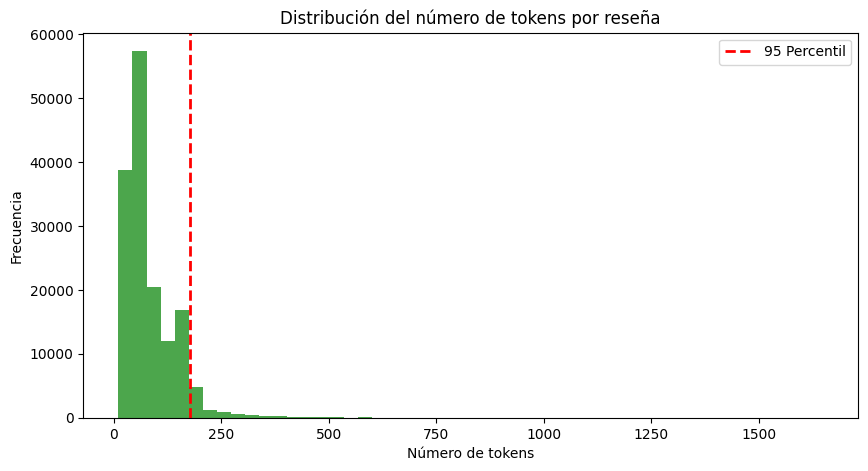

Media de tokens: 83.18
Mediana de tokens: 62.00
90 percentil: 164.00 tokens
95 percentil: 177.00 tokens
99 percentil: 298.00 tokens
Recomendación para max_length en el tokenizer: 177 tokens
Cantidad de reseñas que superan el 95 percentil de tokens: 7660


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Visualizar distribución de tokens
plt.figure(figsize=(10, 5))
plt.hist(token_lengths, bins=50, color='green', alpha=0.7)
plt.xlabel("Número de tokens")
plt.ylabel("Frecuencia")
plt.title("Distribución del número de tokens por reseña")

# Agregar línea para el percentil 95
plt.axvline(np.percentile(token_lengths, 95), color='red', linestyle='dashed', linewidth=2, label='95 Percentil')
plt.legend()

plt.show()

# Obtener estadísticas
mean_tokens = np.mean(token_lengths)
median_tokens = np.median(token_lengths)
percentile_90 = np.percentile(token_lengths, 90)
percentile_95 = np.percentile(token_lengths, 95)
percentile_99 = np.percentile(token_lengths, 99)

# Imprimir estadísticas
print(f"Media de tokens: {mean_tokens:.2f}")
print(f"Mediana de tokens: {median_tokens:.2f}")
print(f"90 percentil: {percentile_90:.2f} tokens")
print(f"95 percentil: {percentile_95:.2f} tokens")
print(f"99 percentil: {percentile_99:.2f} tokens")

# Recomendación para max_length
recommended_max_tokens = int(percentile_95)
print(f"Recomendación para max_length en el tokenizer: {recommended_max_tokens} tokens")

# Opcional: Verificar cuántas reseñas superan el percentil 95
long_reviews = sum([token_length > recommended_max_tokens for token_length in token_lengths])
print(f"Cantidad de reseñas que superan el 95 percentil de tokens: {long_reviews}")


In [ ]:
# Ver valores únicos originales
print("Valores únicos antes de la actualización:", sorted(df_new['Type'].unique()))


Valores únicos antes de la actualización: ['Attractive', 'Hotel', 'Restaurant']


In [ ]:
import numpy as np

# Mapeo deseado
type_mapping = {
    'Attractive': 0,
    'Hotel': 1,
    'Restaurant': 2
}

# Aplicar el mapeo a la columna 'Type' y crear/actualizar la columna 'Polarity'
df_new['Type'] = df_new['Type'].map(type_mapping).astype(np.int64)

# Verificar valores únicos después de la transformación
print("Valores únicos después de la actualización:", sorted(df_new['Type'].unique()))


Valores únicos después de la actualización: [np.int64(0), np.int64(1), np.int64(2)]


In [ ]:
# Ver filas del índice 1 al 10 después de la actualización
print(df_new.iloc[24011:24021])


                                   Title  \
24011             No se lo pueden perder   
24012                    Casa de duendes   
24013      Parte histórica parte natural   
24014           Y más azul qué el cielo.   
24015                          Excelente   
24016    Natación y zip forro de Cenote.   
24017        7 km de playa impresionante   
24018                  Inmejorable vista   
24019                     El mejor lejos   
24020  No regresaremos, mala ecpetiencia   

                                                  Review  Polarity  \
24011  El museo está lleno de escenas típicas de la v...       5.0   
24012  El lugar para se un lugar pequeño te hace sent...       4.0   
24013  Increíble parada cultural con tanta cultura ma...       5.0   
24014  De los cenotes más hermosos que he conocido. T...       5.0   
24015  Me gustó mucho la caminata de Tepozteco mucho....       5.0   
24016  Excursión impresionante a través de la jungla ...       5.0   
24017  Tan relajante que 

In [ ]:
# Contar las instancias por cada valor de 'Polarity'
polarity_counts = df_new['Type'].value_counts().sort_index()

# Imprimir el resumen de las instancias por polaridad
print("Resumen de las instancias por polaridad:")
print(polarity_counts)


Resumen de las instancias por polaridad:
Type
0    51409
1    51409
2    51409
Name: count, dtype: int64


**Fin de paso 2**


In [ ]:
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer
import torch

# Usar el percentil 95 como max_length (has decidido basarte en esto)
#recommended_max_tokens = int(percentile_95)
recommended_max_tokens = 220

# 🔹 Concatenar 'Title' y 'Review' en una sola cadena de texto por fila, llamada nuevamente Review2
df_new['Review2'] = df_new['Title'] + ". " + df_new['Review']  # Puedes ajustar el separador si quieres

# 🔹 Dividir los datos balanceados (df_new) en entrenamiento (75%) y prueba (25%)
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df_new["Review2"].tolist(),         # Lista de reseñas
    df_new["Type"].tolist(),      # Lista de etiquetas
    test_size=0.25,                   # 25% para test
    random_state=42                   # Para reproducibilidad
)

# 🔹 Ahora dividir el conjunto de entrenamiento en entrenamiento (80%) y validación (20%)
train_texts, val_texts, train_labels, val_labels = train_test_split(
    train_texts, train_labels,
    test_size=0.20,                   # 20% de los datos de entrenamiento va a validación
    random_state=42
)




# **TOKENIZACION**

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")

# 🔹 Tokenizar las reseñas con truncamiento y padding
# return_tensors="pt" devuelve tensores de PyTorch
train_encodings = tokenizer(train_texts, padding=True, truncation=True, max_length=recommended_max_tokens, return_tensors="pt")
val_encodings = tokenizer(val_texts, padding=True, truncation=True, max_length=recommended_max_tokens, return_tensors="pt")
test_encodings = tokenizer(test_texts, padding=True, truncation=True, max_length=recommended_max_tokens, return_tensors="pt")


# Ver las primeras filas con el texto concatenado
print(df_new[['Title', 'Review', 'Review2','Type']].head())

                                  Title  \
0  Bonito pero consultaciones Vic Falls   
1                         Digno de ver!   
2                       Hermoso es poco   
3  El origen del PH?,.. yo creo que sí.   
4   Cansado para adultos de la 4ta edad   

                                              Review  \
0  No está mal, pero es bastante peatonal . Largo...   
1  Ya he visto muchos del mundo, pero esto es inc...   
2  Es un excelente lugar, super accesible el acce...   
3  Intersante lugar de Orizaba. Los pequeños muse...   
4  Con el calor de la Riviera Maya sin duda es to...   

                                             Review2  Type  
0  Bonito pero consultaciones Vic Falls. No está ...     0  
1  Digno de ver!. Ya he visto muchos del mundo, p...     0  
2  Hermoso es poco. Es un excelente lugar, super ...     0  
3  El origen del PH?,.. yo creo que sí.. Intersan...     0  
4  Cansado para adultos de la 4ta edad. Con el ca...     0  


### **VERIFICANDO LAS ETIQUETAS**

In [ ]:
# Verificar los primeros valores de 'Polarity' en df_new
print("Primeras 5 etiquetas en df_new['Type']:", df_new['Type'][:5])

# Verificar las primeras 5 etiquetas en train_labels
print("Primeras 5 etiquetas en train_labels:", train_labels[:5])


Primeras 5 etiquetas en df_new['Type']: 0    0
1    0
2    0
3    0
4    0
Name: Type, dtype: int64
Primeras 5 etiquetas en train_labels: [2, 2, 2, 1, 2]


### **nuevo**

In [ ]:
import torch

# Verificar tamaños
print(f"Cantidad de textos de entrenamiento: {len(train_texts)}")
print(f"Cantidad de etiquetas de entrenamiento: {len(train_labels)}")
print(f"Cantidad de textos de validación: {len(val_texts)}")
print(f"Cantidad de etiquetas de validación: {len(val_labels)}")
print(f"Cantidad de textos de prueba: {len(test_texts)}")
print(f"Cantidad de etiquetas de prueba: {len(test_labels)}")

# Verificar si las etiquetas y textos están correctamente alineados (es decir, el número de etiquetas coincide con el número de textos)
assert len(train_texts) == len(train_labels), "El número de textos de entrenamiento no coincide con el número de etiquetas"
assert len(val_texts) == len(val_labels), "El número de textos de validación no coincide con el número de etiquetas"
assert len(test_texts) == len(test_labels), "El número de textos de prueba no coincide con el número de etiquetas"

# Verificar una muestra de las primeras 3 entradas
print(f"Primeras 3 reseñas de entrenamiento: {train_texts[:3]}")
print(f"Primeras 3 etiquetas de entrenamiento: {train_labels[:3]}")


Cantidad de textos de entrenamiento: 92536
Cantidad de etiquetas de entrenamiento: 92536
Cantidad de textos de validación: 23134
Cantidad de etiquetas de validación: 23134
Cantidad de textos de prueba: 38557
Cantidad de etiquetas de prueba: 38557
Primeras 3 reseñas de entrenamiento: ['Opción diferente. Es un lugar pequeñito pero es una buena opción para disfrutar de un concepto diferente. Son expertos en pan artesanal y pasta. En este lugar se ve que hay pasión por lo que hacen.', 'Excelente lugar. Es, en mi opinión, el mejor lugar para comer en Metepec llevo viviendo ahí casi 20 años buena cocina, magnífica ambientación y el servicio es buenísimo', 'riquísimo!. Hay comida deliciosa y poco usual, de diversos paises del mundo, lo que pidas esta delicioso y llenador! Son porciones grandes, vale la pena pedir dos y compartir, las bebidas tambien estan deliciosas, un lugar ademas con vista agradable y t tratan muy bien.']
Primeras 3 etiquetas de entrenamiento: [2, 2, 2]


In [ ]:
# Verificar el tipo y tamaño de los tensores después de la tokenización
print(f"Tamaño de los tensores de entrenamiento: {train_encodings['input_ids'].shape}")
print(f"Tamaño de los tensores de validación: {val_encodings['input_ids'].shape}")
print(f"Tamaño de los tensores de prueba: {test_encodings['input_ids'].shape}")

# Verificar que las etiquetas sean tensores y tengan la misma longitud que los tensores de entrada
train_labels_tensor = torch.tensor(train_labels)
val_labels_tensor = torch.tensor(val_labels)
test_labels_tensor = torch.tensor(test_labels)

print(f"Tamaño de las etiquetas de entrenamiento: {train_labels_tensor.shape}")
print(f"Tamaño de las etiquetas de validación: {val_labels_tensor.shape}")
print(f"Tamaño de las etiquetas de prueba: {test_labels_tensor.shape}")


Tamaño de los tensores de entrenamiento: torch.Size([92536, 220])
Tamaño de los tensores de validación: torch.Size([23134, 220])
Tamaño de los tensores de prueba: torch.Size([38557, 220])
Tamaño de las etiquetas de entrenamiento: torch.Size([92536])
Tamaño de las etiquetas de validación: torch.Size([23134])
Tamaño de las etiquetas de prueba: torch.Size([38557])


### **CONTINUAMOS CON LA CONVERSION DE LAS ETIQUETAS A PYTORCH**

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer

# Convertir etiquetas a tensores
train_labels_tensor = torch.tensor(train_labels).clone().detach()  # Convertir a tensor y evitar gradientes
val_labels_tensor = torch.tensor(val_labels).clone().detach()  # Convertir a tensor y evitar gradientes
test_labels_tensor = torch.tensor(test_labels).clone().detach()  # Convertir a tensor y evitar gradientes

# Crear datasets
train_dataset = TensorDataset(
    train_encodings['input_ids'].clone().detach(),  # Usamos clone().detach() en lugar de torch.tensor()
    train_encodings['attention_mask'].clone().detach(),  # Lo mismo aquí
    train_labels_tensor
)

val_dataset = TensorDataset(
    val_encodings['input_ids'].clone().detach(),  # Lo mismo aquí
    val_encodings['attention_mask'].clone().detach(),  # Lo mismo aquí
    val_labels_tensor
)

test_dataset = TensorDataset(
    test_encodings['input_ids'].clone().detach(),  # Lo mismo aquí
    test_encodings['attention_mask'].clone().detach(),  # Lo mismo aquí
    test_labels_tensor
)

# Crear DataLoaders
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=16)
test_dataloader = DataLoader(test_dataset, batch_size=16)

# 🔹 Verificar la primera entrada de un batch para asegurar que todo esté bien
print("Ejemplo de batch del DataLoader de entrenamiento:")
for batch in train_dataloader:
    input_ids_batch, attention_mask_batch, labels_batch = batch
    print(f"Input IDs shape: {input_ids_batch.shape}")
    print(f"Attention Mask shape: {attention_mask_batch.shape}")
    print(f"Labels shape: {labels_batch.shape}")
    break  # Solo imprimimos el primer batch

# 🔹 Verificar que las longitudes de las listas de datos y etiquetas coincidan
print(f"Cantidad de textos de entrenamiento: {len(train_labels_tensor)}")
print(f"Cantidad de textos de validación: {len(val_labels_tensor)}")
print(f"Cantidad de textos de prueba: {len(test_labels_tensor)}")



Ejemplo de batch del DataLoader de entrenamiento:
Input IDs shape: torch.Size([16, 220])
Attention Mask shape: torch.Size([16, 220])
Labels shape: torch.Size([16])
Cantidad de textos de entrenamiento: 92536
Cantidad de textos de validación: 23134
Cantidad de textos de prueba: 38557


In [ ]:
num_labels = len(set(train_labels))
print(f"El número de etiquetas únicas en el conjunto de entrenamiento es: {num_labels}")

El número de etiquetas únicas en el conjunto de entrenamiento es: 3


Optimizador

In [ ]:
import torch
from torch.optim import AdamW  # Cambio en la importación de AdamW
import torch.nn as nn
from transformers import BertForSequenceClassification

# Paso 1: Seleccionar dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Usando el dispositivo: {device}")

# Paso 2: Cargar modelo BERT preentrenado en inglés para clasificación con 5 clases ---------------------
model = BertForSequenceClassification.from_pretrained("dccuchile/bert-base-spanish-wwm-cased", num_labels=3)

# Paso 3: Congelar capas de BERT (por ejemplo, las primeras 6 de 12)
for name, param in model.bert.encoder.layer[:6].named_parameters():
    param.requires_grad = False
print("🔒 Capas congeladas: 0 a 5")

# Paso 4: Mover modelo al dispositivo (GPU o CPU)
model.to(device)

# Paso 5: Optimización y función de pérdida
optimizer = AdamW(model.parameters(), lr=1e-5) # Ajustar la tasa de aprendizaje si es necesario

# Definir la función de pérdida (Cross Entropy Loss)
criterion = nn.CrossEntropyLoss()

✅ Usando el dispositivo: cuda


pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


🔒 Capas congeladas: 0 a 5


In [ ]:
import numpy as np

# Verificar las primeras 5 etiquetas
print("Primeras 5 etiquetas:", train_labels[:5])

# Comprobar si alguna etiqueta es un vector one-hot
for i, label in enumerate(train_labels[:10]):  # Verifica las primeras 10 etiquetas
    if isinstance(label, list) or isinstance(label, np.ndarray):
        if sum(label) != 1:
            print(f"Etiqueta en formato one-hot en el índice {i}: {label}")
        else:
            print(f"Etiqueta en formato one-hot válida en el índice {i}: {label}")
    else:
        print(f"Etiqueta en formato índice de clase en el índice {i}: {label}")

Primeras 5 etiquetas: [2, 2, 2, 1, 2]
Etiqueta en formato índice de clase en el índice 0: 2
Etiqueta en formato índice de clase en el índice 1: 2
Etiqueta en formato índice de clase en el índice 2: 2
Etiqueta en formato índice de clase en el índice 3: 1
Etiqueta en formato índice de clase en el índice 4: 2
Etiqueta en formato índice de clase en el índice 5: 0
Etiqueta en formato índice de clase en el índice 6: 0
Etiqueta en formato índice de clase en el índice 7: 1
Etiqueta en formato índice de clase en el índice 8: 2
Etiqueta en formato índice de clase en el índice 9: 0


### **Parte 5: Entrenamiento (model.train())**
Aquí es donde ocurre el fine-tuning real, es decir, se ajustan los pesos del modelo con tus propios datos.

Lo que sucede:
* Se activa el modo entrenamiento (model.train()).
* Se pasan los datos por el modelo (outputs = model(...)).
* Se calcula la pérdida (loss = outputs.loss).
* Se hace backpropagation (loss.backward()).
* Se actualizan los pesos con el optimizador (optimizer.step()).

**02 de Mayo Full data**

In [ ]:
import os
import matplotlib.pyplot as plt

# ---------------- Listas para guardar métricas  ----------------------------
train_losses = []
val_losses = []
val_accuracies = []
#----------------------------------------------------------------------------

# Inicializar early stopping
best_val_loss = float('inf')
patience = 2  # Número de épocas sin mejora para detener
patience_counter = 0

# Número de épocas de entrenamiento
num_epochs = 10  # Puedes aumentarlo gracias a early stopping

# 📂 Carpeta donde guardarás el mejor modelo
best_model_dir = "/content/drive/MyDrive/IA/best_model_types"
os.makedirs(best_model_dir, exist_ok=True)

# ========================== ENTRENAMIENTO ==========================
for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0

    for batch in train_dataloader:  # 🔄 corregido
        input_ids, attention_mask, labels = [item.to(device) for item in batch]

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_dataloader)

    # ---------------- Evaluación ----------------
    model.eval()
    total_val_loss = 0
    correct_predictions = 0

    for batch in val_dataloader:  # 🔄 corregido
        input_ids, attention_mask, labels = [item.to(device) for item in batch]

        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits

        total_val_loss += loss.item()
        preds = torch.argmax(logits, dim=1)
        correct_predictions += (preds == labels).sum().item()

    avg_val_loss = total_val_loss / len(val_dataloader)
    accuracy = correct_predictions / len(val_dataloader.dataset)

    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    val_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}")
    print(f"  🔹 Train loss: {avg_train_loss:.4f}")
    print(f"  🔹 Validation loss: {avg_val_loss:.4f}")
    print(f"  ✅ Validation accuracy: {accuracy * 100:.2f}%")

    # ---------- EARLY STOPPING ----------
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0

        # ✅ Guardar modelo y tokenizer
        model.save_pretrained(best_model_dir)
        tokenizer.save_pretrained(best_model_dir)
        print(f"💾 Mejor modelo guardado en {best_model_dir}")
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("🛑 Early stopping activado.")
            break

# ---------------- GRAFICAR RESULTADOS ----------------
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Pérdida de entrenamiento vs validación")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot([acc * 100 for acc in val_accuracies], label='Validation Accuracy', color='green')
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Precisión en validación por época")
plt.legend()
plt.grid(True)
plt.show()


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
import torch
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
from transformers import BertForSequenceClassification
import matplotlib.pyplot as plt
import seaborn as sns

# 📥 Cargar mejor modelo entrenado con 3 clases (Attractive, Hotel, Restaurant)
best_model = BertForSequenceClassification.from_pretrained(best_model_dir).to(device)
best_model.eval()

all_preds = []
all_labels = []

# 🔍 Realizar predicciones
with torch.no_grad():
    for batch in test_dataloader:
        input_ids, attention_mask, labels = [x.to(device) for x in batch]

        outputs = best_model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# 📊 Calcular métricas
accuracy = accuracy_score(all_labels, all_preds)
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')
report = classification_report(all_labels, all_preds, digits=4)

# 🖨️ Mostrar métricas
print("\n📊 Resultados en el conjunto de TEST:")
print(f"✅ Accuracy:  {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall:    {recall:.4f}")
print(f"✅ F1 Score:  {f1:.4f}")
print("\n📄 Reporte de clasificación por clase:\n")
print(report)

# 🧱 Matriz de confusión
label_map = {0: "Attractive", 1: "Hotel", 2: "Restaurant"}
labels_names = [label_map[i] for i in sorted(label_map.keys())]

cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels_names, yticklabels=labels_names)
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.title("🧱 Matriz de Confusión en Test Set")
plt.tight_layout()
plt.show()


**Pruebas con el conjunto Test**

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
from transformers import BertForSequenceClassification

# Cargar mejor modelo entrenado con 3 etiquetas (Attractive, Hotel, Restaurant)
best_model = BertForSequenceClassification.from_pretrained(best_model_dir).to(device)
best_model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_dataloader:
        input_ids, attention_mask, labels = [x.to(device) for x in batch]

        outputs = best_model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Métricas
accuracy = accuracy_score(all_labels, all_preds)
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')
report = classification_report(all_labels, all_preds, digits=4)

print("\n📊 Resultados en el conjunto de TEST:")
print(f"✅ Accuracy:  {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall:    {recall:.4f}")
print(f"✅ F1 Score:  {f1:.4f}")
print("\n📄 Reporte de clasificación por clase:\n")
print(report)


**Cargar Modelo BERT previamente entrenado para clasificación de texto**

In [ ]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

# 1. 📥 Leer el archivo
file_path = "/content/drive/MyDrive/IA/Rest-Mex_2025_test.xlsx"
df_test = pd.read_excel(file_path)

# 2. 🧾 Concatenar 'Title' y 'Review'
df_test["text"] = df_test["Title"].astype(str) + ". " + df_test["Review"].astype(str)

# 3. 🔤 Cargar el tokenizer correcto
tokenizer = BertTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")

# 4. 🧠 Cargar el modelo entrenado para Types
model_path = "/content/drive/MyDrive/IA/best_model_types"
model = BertForSequenceClassification.from_pretrained(model_path).to("cuda" if torch.cuda.is_available() else "cpu")
device = model.device
model.eval()

# 5. 🧹 Tokenizar los textos
encodings = tokenizer(df_test['text'].tolist(),
                      truncation=True,
                      padding=True,
                      max_length=128,
                      return_tensors="pt")

# 6. 📦 Crear DataLoader
dataset = TensorDataset(encodings["input_ids"], encodings["attention_mask"])
dataloader = DataLoader(dataset, batch_size=32)

# 7. 🔍 Predicción
all_preds = []

with torch.no_grad():
    for batch in tqdm(dataloader, desc="Clasificando Types"):
        input_ids, attention_mask = [x.to(device) for x in batch]

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        all_preds.extend(preds.cpu().numpy())

# 8. 🔁 Opcional: Mapear predicciones de números a etiquetas si se quiere
type_reverse_mapping = {
    0: "Attractive",
    1: "Hotel",
    2: "Restaurant"
}
predicted_labels = [type_reverse_mapping[p] for p in all_preds]

# 9. 💾 Guardar resultados
df_result = pd.DataFrame({
    "ID": df_test["ID"],
    "Predicted_Type": predicted_labels  # o usa all_preds si prefieres los números
})

output_path = "/content/drive/MyDrive/IA/Rest-Mex_2025_test_results_types.csv"
df_result.to_csv(output_path, index=False)

print(f"✅ Resultados guardados en: {output_path}")
